In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
def ignore_warns(*args,**kwargs):
    pass
   
warnings.warn=ignore_warns # ignora i messaggi di warning di sklearn e seaborn

from scipy import stats
from scipy.stats import norm,skew # per statistiche avanzate

In [2]:
train= pd.read_csv("train.ames.txt")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test= pd.read_csv("test.ames.txt")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
#vediamo i valori nulli
print("I valori mancanti in perentuale")
print(train.isnull().mean())
print("In valori assoluti")
train.isnull().sum().sort_values(ascending = False)

I valori mancanti in perentuale
Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64
In valori assoluti


PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [6]:
#salvo da parte l'ID
train_ID=train["Id"]
test_ID=test["Id"]

#una volta salvata eliminiamo la colonna id 
train.drop("Id",axis=1,inplace= True)
test.drop("Id",axis=1,inplace=True)

Preprocessing
===

Outliers
----

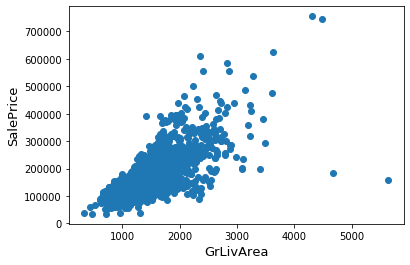

In [7]:
#Vediamo gli outlier in base a metri quadri e prezzo
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

Ci sono due outlier in basso a destra che hanno un'area in metri quadri molto vasta ma un prezzo relativamente basso. Poichè sono dati di training e potrebbero causarmi un overfitting posso eliminarli


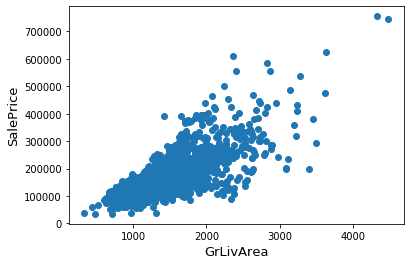

In [8]:
#Elimino i valori con un area superiore di 4k metri quadrati e un prezzo inferiore a 300k
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#rivediamo il grafico
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)# Fontsize mi modifica la dimensione delle etichette
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

Variabile Target
----

In [9]:
#Vediamo quali variabili sono più correlate 
(train.corr()**2)["SalePrice"].sort_values(ascending=False).head(20)

SalePrice       1.000000
OverallQual     0.633257
GrLivArea       0.540178
TotalBsmtSF     0.424000
GarageCars      0.410941
1stFlrSF        0.398831
GarageArea      0.395915
FullBath        0.316029
TotRmsAbvGrd    0.289195
YearBuilt       0.274166
YearRemodAdd    0.257776
GarageYrBlt     0.237321
MasVnrArea      0.233018
Fireplaces      0.220771
BsmtFinSF1      0.167595
LotFrontage     0.137333
WoodDeckSF      0.105468
OpenPorchSF     0.103132
2ndFlrSF        0.102740
HalfBath        0.080992
Name: SalePrice, dtype: float64


 mu = 180932.92 and sigma = 79467.79



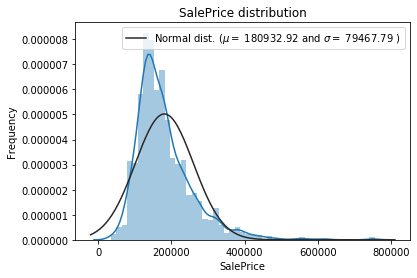

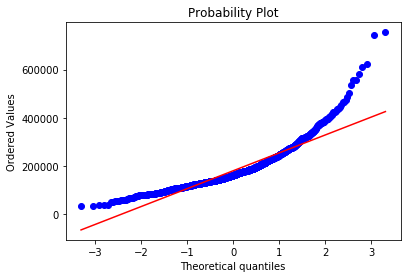

In [10]:
sns.distplot(train['SalePrice'] , fit=norm); #densità della variabile

# Parametri della funzione  
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#grafico della nuova funzione confrontato con una normale
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Otteniamo il QQ-plot o probability plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [11]:
train.SalePrice.skew()#Come possiamo immaginare c'è uno skewness verso destra. La variabile andrebbe normalizzata

1.8812964895244009

Log-transformation of the target variable
---


 mu = 12.02 and sigma = 0.40



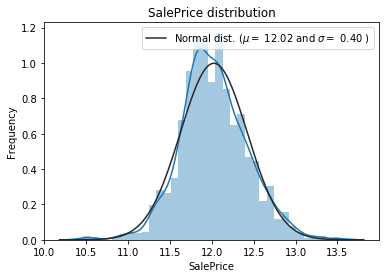

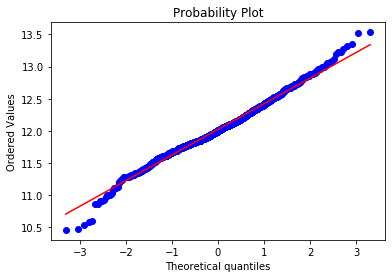

In [12]:
#Usiamo la funzione di numpy log1p che applica log(1+x) a tutti gli elementi della colonna
train["SalePrice"] = np.log1p(train["SalePrice"])

#Verificbiamo la nuova distribuzione
sns.distplot(train['SalePrice'] , fit=norm);

# Otteniamo i nuovi parametri usati dalla funzione
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


#Nuovo grafico della distribuzione
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Otteniamo il QQ-plot 
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()
#vedere loc= best 
#cosa è il QQ- plot

In [13]:
train.SalePrice.skew()# Lo skewness adesso è molto ridimensionato( prima era 1.88)

0.12157976050304875

Features Engineering
---

In [14]:
#concateniamo train e test
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


Dati mancanti
----

In [15]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageYrBlt,5.450806
GarageQual,5.450806
GarageCond,5.450806


Text(0.5, 1.0, 'Percent missing data by feature')

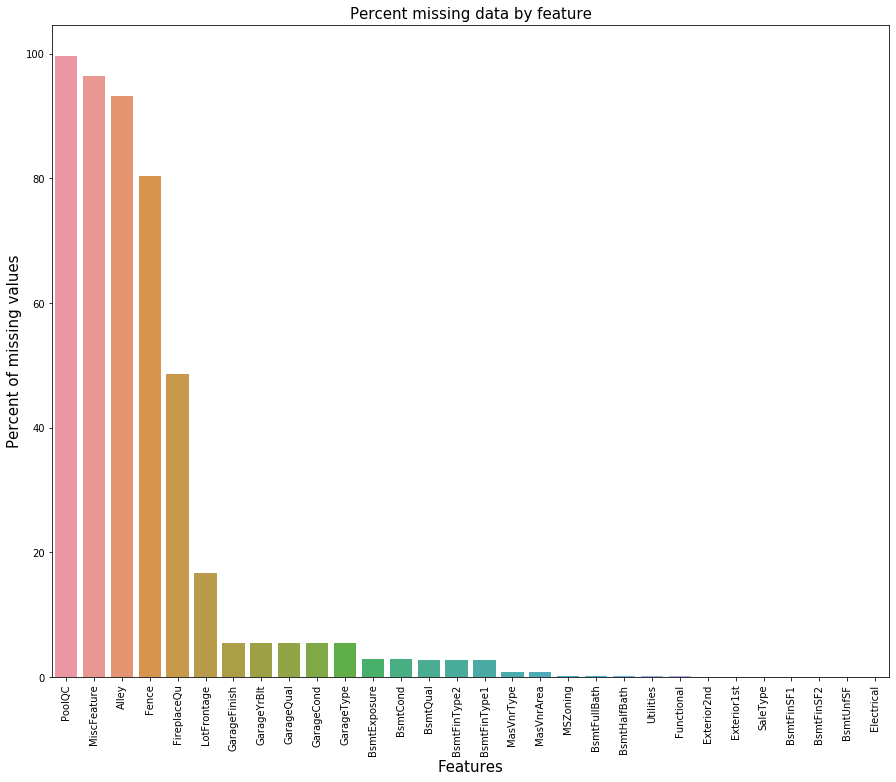

In [16]:
#Grafico numero mancanti Per variabili
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')# ruoto i nomi delle variabili sull'asse x
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

Correlazione tra dati
---

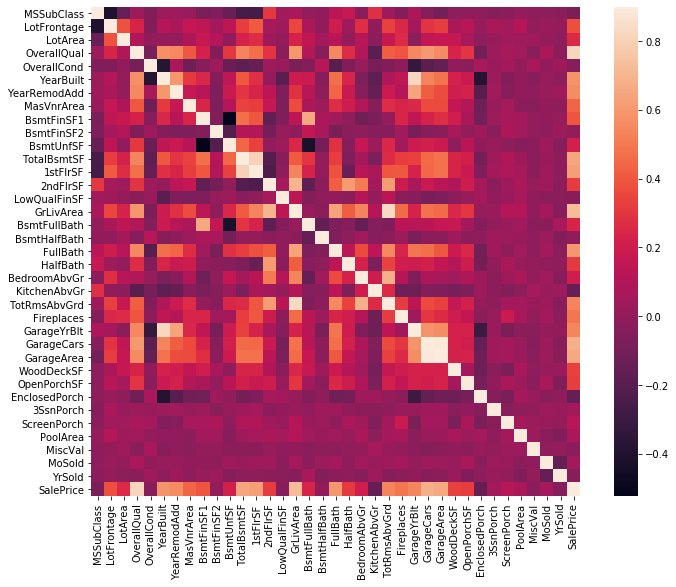

In [17]:
# MAppa delle correlazioniper vedere quali variabili sono correlate con SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
#Da vedere vmax e square

Imputazione valori mancanti
----

In [18]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")#NA sta per "no pool" (vedere data_description)


In [19]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")#Idem per questa variabile

In [20]:
#Come sopra Na = "No Alley access"
all_data["Alley"] = all_data["Alley"].fillna("None")

In [21]:
all_data["Fence"] = all_data["Fence"].fillna("None")

In [22]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [23]:
#Poichè l'area di ogni strada connessa alla casa ha un'area simile alle altre del quartiere,  possiamo imputare con la mediana della variabile Neighborood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [24]:
#per queste variabili qualitative missing = no garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [25]:
#per queste variabili quantitative missing = no garage
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [26]:
# missing  significa "no basement"
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [27]:
#caso qualitativo
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [28]:
#nessun rivestimento in muratura si presume che sia il missing
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [29]:
#in questo caso sono pochi i missing(4) mi permetto di imputare con la moda (2263 su 2917)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [30]:
#Nonè molto predittiva perche tutte uguali con poche eccezioni
all_data = all_data.drop(['Utilities'], axis=1)

Procesiamo su questa linea per le rimanenti fino a che non avremo più missing

In [31]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [32]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [33]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [34]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [35]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [36]:

#vediamo i valori nulli
print("I valori mancanti in perentuale")
print(all_data.isnull().mean())
print("In valori assoluti")
all_data.isnull().sum().sort_values(ascending = False)

I valori mancanti in perentuale
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
                ... 
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
Length: 78, dtype: float64
In valori assoluti


SaleCondition    0
BsmtQual         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
                ..
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
MSSubClass       0
Length: 78, dtype: int64

**Trasformiamo alcune variabili numeriche in variabili categoriche**

In [37]:
#MSSubClass: The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


# OverallCond: Overall condition rating
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#YrSold MoSold sono Anno e mese di vendita
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

Queste variabili sono categoriche ma potrebbero essere ordinali. Usiamo il label encoder

In [38]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# processiamo le colonne, applichiamo il LabelEncoder a variabili categoriche
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


Aggiungo un'ultima variabile
---

In [39]:
# Sommiamo il totale dei metri quadrati
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

Analizziamo l'asimmetria delle variabili
----

In [40]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Vallutiamo lo skewness di tutte le variabili numeriche
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkewness nelle variabili numeriche: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skewness nelle variabili numeriche: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


TRasformazione di Box e Cox di variabili molto asimmetriche
----

In [41]:
skewness = skewness[abs(skewness) > 0.75]
print("Ci sono {} variabili numeriche asimmmetriche da trasformare con la trasformata di Box-Cox".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

Ci sono 59 variabili numeriche asimmmetriche da trasformare con la trasformata di Box-Cox


In [42]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [43]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [44]:
#Per analizzare le correlazioni tra variabili si usa il VIF
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
X=train.select_dtypes("float64")

X.shape

(1458, 59)

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Columns: 220 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(59), uint8(161)
memory usage: 901.3 KB


MODELLI
===

In [47]:
#Import il mio modello di regressione lineare e adatto ai dati di training
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
model=LinearRegression()
model.fit(train,y_train)

#Modelli avanzati
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
#import xgboost as xgb
#import lightgbm as lgb

Definiamo una strategia di cross validation
===

Utilizziamo la funzione cross_val_score di Sklearn. 
Poichè questa funzione non ha un attributo per lo shuffle, aggiungiamo una linea di codice in modo di mescolare il dataset prima della convalida incrociata

In [48]:
#Funzione di validazione
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

Regressione lasso
---

In [49]:
#regressione_lasso
regressione_lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [50]:
score = rmsle_cv(regressione_lasso)
print("\nmodel score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


model score: 0.1115 (0.0074)



Regressione elasticnet
---

In [51]:
#Regressione elasticnet
regressione_ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [52]:
score = rmsle_cv(regressione_ENet)
print("\nmodel score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


model score: 0.1116 (0.0074)



Regressione Ridge
---

In [53]:
#Kernel rigdge regression
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [54]:
score = rmsle_cv(KRR)
print("\nmodel score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


model score: 0.1153 (0.0075)



In [56]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [57]:
regressione_lasso.fit(train.values,y_train)
regressione_predt=regressione_lasso.predict(train.values)
regressione_pred=np.expm1(regressione_lasso.predict(test.values))
print(rmsle(y_train,regressione_predt))
                          

0.10141419368238647
